In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from numpy.random import rand


In [2]:
def objetivo (x):
    return x[0]**2.0 + x[1]**2.0

In [6]:
r_min, r_max = -5.0,5.0

In [7]:
pt = r_min + rand(2)*(r_max-r_min)
pt

array([-2.26248001, -1.74611759])

In [15]:
result = minimize(objetivo, 
                  pt,
                  #method='nelder-mead'
                  method='L-BFGS-B'
                 )
result.

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 8.615020898772e-15
        x: [-9.230e-08 -9.764e-09]
      nit: 2
      jac: [-1.746e-07 -9.528e-09]
     nfev: 9
     njev: 3
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

In [22]:
result.fun

8.615020898772e-15

In [23]:
print('status : %s' % result['message'])
print('total evaluation: %d' % result['nfev'] )

status : CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
total evaluation: 9


In [24]:
solution = result['x']
solution

array([-9.23021626e-08, -9.76379444e-09])

In [25]:
evaluation = objetivo(solution)
print('solution : f(%s) = %5f' % (solution, evaluation))

solution : f([-9.23021626e-08 -9.76379444e-09]) = 0.000000


In [18]:
from scipy.optimize import minimize

def objective(x):
    return x[0]*x[3]*(x[0]+x[1]+x[2])+x[2]

def constraint1(x):
    return x[0]*x[1]*x[2]*x[3]-25.0

def constraint2(x):
    sum_eq = 40.0
    for i in range(4):
        sum_eq = sum_eq - x[i]**2
    return sum_eq

#initial guesses
x0 = [1,5,5,1]

#optimize
b = (1.0,5.0)
bnds = (b, b, b, b)
con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'eq', 'fun': constraint2} 
cons = ([con1,con2]) 
solution = minimize(objective,x0,method='SLSQP',
                    bounds=bnds,constraints=cons) 
x = solution.x

#print solution
print('Objective: ' + str(objective(x)))
print('Solution:',x)


Objective: 17.01401724563517
Solution: [1.         4.7429961  3.82115462 1.37940765]


Text(0, 0.5, 'Cost')

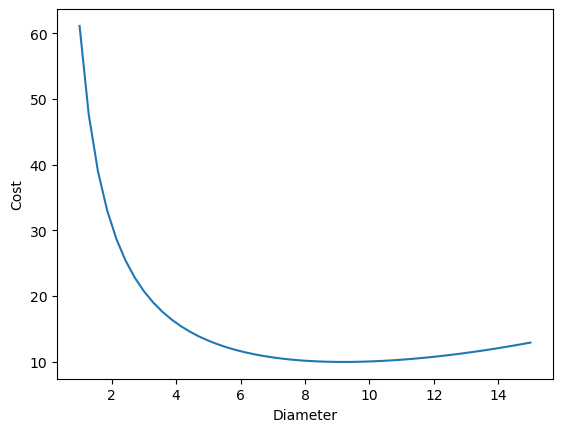

In [26]:
import numpy as np
from scipy.optimize import minimize

V = 355
ct = 0.025  # Cost of the top $/cm**2
cs = 0.043  # Cost of the side $/cm**2

def cost(D):
    radius = D / 2
    top_area = np.pi * radius**2
    top_bottom_cost = 2 * ct * top_area
    L = 4 * V / np.pi / D**2 # solved from the volume
    side_cost = cs * L * np.pi * D
    return top_bottom_cost + side_cost

D = np.linspace(1, 15)
c = cost(D)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(D, c)
plt.xlabel('Diameter')
plt.ylabel('Cost')

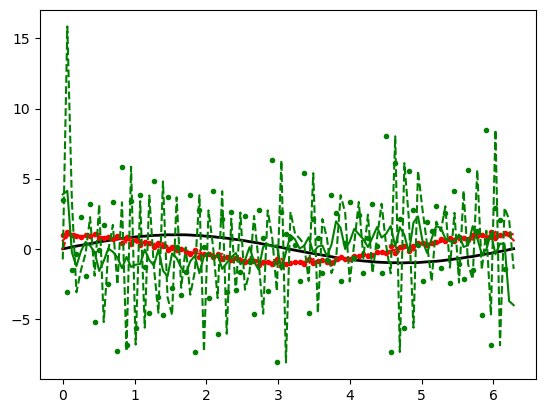

In [1]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

#Data:
x = np.linspace(0,2*np.pi,100)
f = np.sin(x) + .02*(np.random.rand(100)-.5)

#Normalization:
dx = x[1] - x[0] # use np.diff(x) if x is not uniform
dxdx = dx**2

#First derivatives:
df = np.diff(f) / dx
cf = np.convolve(f, [1,-1]) / dx
gf = ndimage.gaussian_filter1d(f, sigma=1, order=1, mode='wrap') / dx

#Second derivatives:
ddf = np.diff(f, 2) / dxdx
ccf = np.convolve(f, [1, -2, 1]) / dxdx
ggf = ndimage.gaussian_filter1d(f, sigma=1, order=2, mode='wrap') / dxdx

#Plotting:
plt.figure()
plt.plot(x, f, 'k', lw=2, label='original')
plt.plot(x[:-1], df, 'r.', label='np.diff, 1')
plt.plot(x, cf[:-1], 'r--', label='np.convolve, [1,-1]')
plt.plot(x, gf, 'r', label='gaussian, 1')
plt.plot(x[:-2], ddf, 'g.', label='np.diff, 2')
plt.plot(x, ccf[:-2], 'g--', label='np.convolve, [1,-2,1]')
plt.plot(x, ggf, 'g', label='gaussian, 2')

Text(0.5, 1.0, 'second derivative')

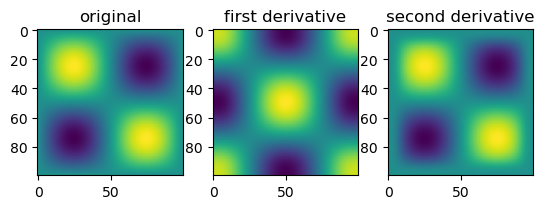

In [2]:
from scipy import ndimage

x = np.linspace(0,2*np.pi,100)
sine = np.sin(x)

im = sine * sine[...,None]
d1 = ndimage.gaussian_filter(im, sigma=5, order=1, mode='wrap')
d2 = ndimage.gaussian_filter(im, sigma=5, order=2, mode='wrap')

plt.figure()

plt.subplot(131)
plt.imshow(im)
plt.title('original')

plt.subplot(132)
plt.imshow(d1)
plt.title('first derivative')

plt.subplot(133)
plt.imshow(d2)
plt.title('second derivative')

Text(0.5, 1.0, 'along axis 1')

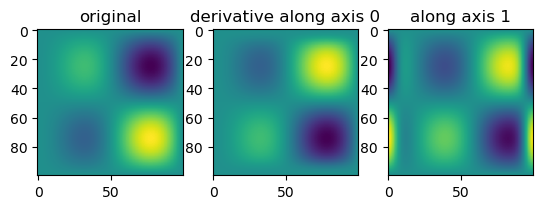

In [3]:
imx = im * x
d2_0 = ndimage.gaussian_filter1d(imx, axis=0, sigma=5, order=2, mode='wrap')
d2_1 = ndimage.gaussian_filter1d(imx, axis=1, sigma=5, order=2, mode='wrap')

plt.figure()
plt.subplot(131)
plt.imshow(imx)
plt.title('original')
plt.subplot(132)
plt.imshow(d2_0)
plt.title('derivative along axis 0')
plt.subplot(133)
plt.imshow(d2_1)
plt.title('along axis 1')

In [4]:
d2_mag = np.sqrt(d2_0**2 + d2_1**2)

In [9]:
from numpy import convolve

ValueError: x and y must have same first dimension, but have shapes (100,) and (101,)

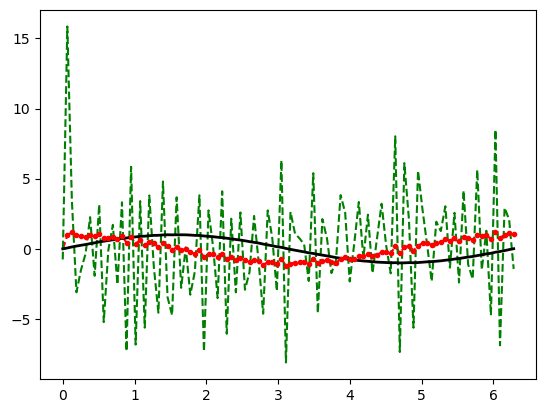

In [12]:
#First derivatives:
cf = np.convolve(f, [1,-1]) / dx

#Second derivatives:
ccf = np.convolve(f, [1, -2, 1]) / dxdx

plt.plot(x, cf[:-1], 'r--', label='np.convolve, [1,-1]')
plt.plot(x, ccf[:-2], 'g--', label='np.convolve, [1,-2,1]')
plt.plot(x, f, 'k', lw=2, label='original')
plt.plot(x[1:], df, 'r.', label='np.diff, 1')
plt.plot(x, cf, 'rx', label='np.convolve, [1,-1]')
plt.plot(x, gf, 'r', label='gaussian, 1')
plt.plot(x[1:-1], ddf, 'g.', label='np.diff, 2')
plt.plot(x, ccf, 'gx', label='np.convolve, [1,-2,1]')
plt.plot(x, ggf, 'g', label='gaussian, 2')

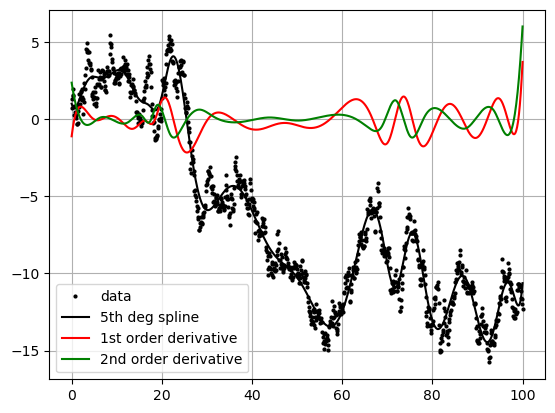

In [13]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

# data
n = 1000
x = np.linspace(0, 100, n)
y = 0.5 * np.cumsum(np.random.randn(n))

k = 5 # 5th degree spline
s = n - np.sqrt(2*n) # smoothing factor
spline_0 = UnivariateSpline(x, y, k=k, s=s)
spline_1 = UnivariateSpline(x, y, k=k, s=s).derivative(n=1)
spline_2 = UnivariateSpline(x, y, k=k, s=s).derivative(n=2)

# plot data, spline fit, and derivatives
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y, 'ko', ms=2, label='data')
ax.plot(x, spline_0(x), 'k', label='5th deg spline')
ax.plot(x, spline_1(x), 'r', label='1st order derivative')
ax.plot(x, spline_2(x), 'g', label='2nd order derivative')

ax.legend(loc='best')
ax.grid()

In [14]:
#https://github.com/stefanmeili/FastFD

# Import fastfd and select the scipy sparse library (or cupy for GPU support)
import fastfd as ffd
ffd.sparse_lib('scipy')

import numpy as np

# Define axes
x = ffd.LinearAxis('x', start = 0, stop = 1, num = 201)
y = ffd.LinearAxis('y', start = 0, stop = 1, num = 201)

# Define scalars
T = ffd.Scalar('T', [x, y], accuracy = 4)

# Define the model
model = ffd.FDModel([T])

# Set model governing equations (thermal diffusion)
model.update_equations({
    'Conductivity': ((T.d('x', 2) + T.d('y', 2)), 0),
})

# Set model boundary conditions
model.update_bocos({
    'Tx=1 adiabatic': (T.i[-1, :], T.d('x')[-1, :], 0),
    'Ty=1 adiabatic': (T.i[:, -1], T.d('y')[:, -1], 0),
    'Tx=0 sinewave': (T.i[0, :], T.i[0, :], 100 * np.sin(x.coords * 2*np.pi)),
    'Ty=0 sinewave': (T.i[:, 0], T.i[:, 0], -100 * np.sin(y.coords * 2*np.pi)),
})

# Solve the model
result = model.solve()

ModuleNotFoundError: No module named 'fastfd'

In [ ]:
#https://github.com/stefanmeili/FastFD/blob/main/docs/examples/Heat%20Conduction.ipynb
#https://math.stackexchange.com/questions/3230769/how-to-implement-finite-difference-method-ode-boundary-value-problem-in-python

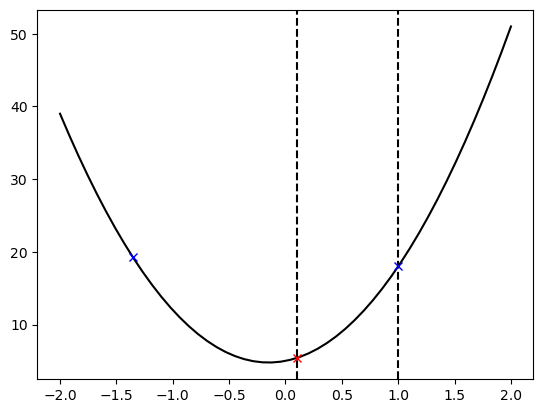

In [15]:
#https://math.stackexchange.com/questions/3230769/how-to-implement-finite-difference-method-ode-boundary-value-problem-in-python

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bracket
def f(x):
    return 10*x**2 + 3*x + 5
x = np.linspace(-2, 2)
y = f(x)
init_xa, init_xb = 0.1, 1
xa, xb, xc, fa, fb, fc, funcalls = bracket(f, xa=init_xa, xb=init_xb)
plt.axvline(x=init_xa, color="k", linestyle="--")
plt.axvline(x=init_xb, color="k", linestyle="--")
plt.plot(x, y, "-k")
plt.plot(xa, fa, "bx")
plt.plot(xb, fb, "rx")
plt.plot(xc, fc, "bx")
plt.show()

C:\Users\flcoelho\AppData\Local\Temp\ipykernel_3532\769603615.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
[ 0.   -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 50.  ]


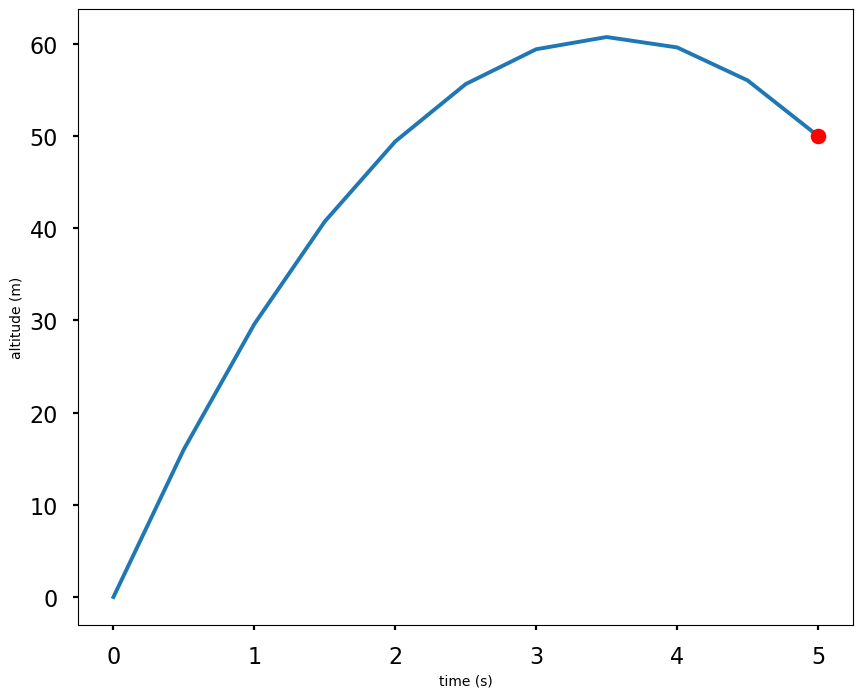

In [16]:
#https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter23.03-Finite-Difference-Method.html

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

n = 10
h = (5-0) / n

# Get A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -2
    A[i, i+1] = 1

print(A)

# Get b
b = np.zeros(n+1)
b[1:-1] = -9.8*h**2
b[-1] = 50
print(b)

# solve the linear equations
y = np.linalg.solve(A, b)

t = np.linspace(0, 5, 11)

plt.figure(figsize=(10,8))
plt.plot(t, y)
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.show()

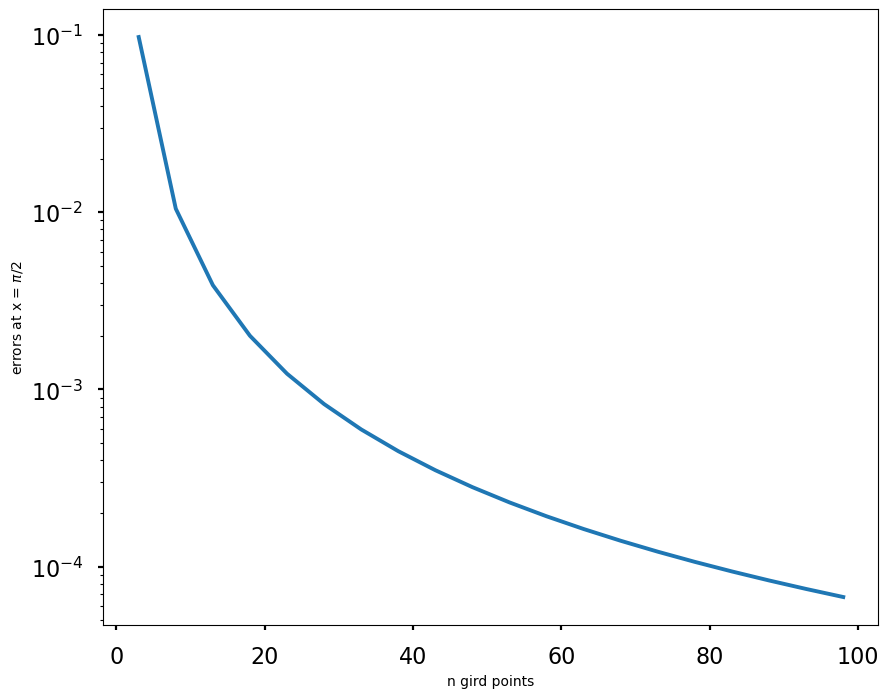

In [17]:
def get_a_b(n):
    h = (np.pi/2-0) / n
    x = np.linspace(0, np.pi/2, n+1)
    # Get A
    A = np.zeros((n+1, n+1))
    A[0, 0] = 1
    A[n, n] = -2+4*h**2
    A[n, n-1] = 2
    for i in range(1, n):
        A[i, i-1] = 1
        A[i, i] = -2+4*h**2
        A[i, i+1] = 1

    # Get b
    b = np.zeros(n+1)
    for i in range(1, n+1):
        b[i] = 4*h**2*x[i]
    
    return x, A, b

x = np.pi/2
v = x - np.sin(2*x)

n_s = []
errors = []

for n in range(3, 100, 5):
    x, A, b = get_a_b(n)
    y = np.linalg.solve(A, b)
    n_s.append(n)
    e = v - y[-1]
    errors.append(e)
    
plt.figure(figsize = (10,8))
plt.plot(n_s, errors)
plt.yscale('log')
plt.xlabel('n gird points')
plt.ylabel('errors at x = $\pi/2$')
plt.show()

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_bvp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

C:\Users\flcoelho\AppData\Local\Temp\ipykernel_3532\2143313606.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


NameError: name 'solve_ivp' is not defined

In [19]:
import multiprocessing as mp

In [20]:
print(f"Number of cpu: {mp.cpu_count()}")

Number of cpu: 8


In [22]:
#Serial version

import numpy as np
import time

def random_square(seed):
    np.random.seed(seed)
    random_num = np.random.randint(0, 10)
    return random_num**2

t0 = time.time()
results = []
for i in range(10000000): 
    results.append(random_square(i))
t1 = time.time()
print(f'Execution time {t1 - t0} s')

Execution time 86.05249285697937 s


In [ ]:
#Parallel version

t0 = time.time()
n_cpu = mp.cpu_count()

pool = mp.Pool(processes=n_cpu)
results = [pool.map(random_square, range(10000000))]
t1 = time.time()
print(f'Execution time {t1 - t0} s')

In [23]:
#https://stackoverflow.com/questions/61125925/optimization-help-involving-matrix-operations-and-constraints


import numpy as np
import pandas as pd
from scipy.optimize import linprog

data = {'customerid':[101,102,103,104,105,106,107,108,109,110],
        'prob_CHOICEA':[0.00317,0.00629,0.00242,0.00253,0.00421,0.00414,0.00739,0.00549,0.00658,0.00852],
        'prob_CHOICEB':[0.061,0.087,0.055,0.027,0.022,0.094,0.099,0.072,0.018,0.052],
        'prob_CHOICEC':[0.024,0.013,0.091,0.047,0.071,0.077,0.067,0.046,0.077,0.044]
       } 

# Creates pandas DataFrame 
df = pd.DataFrame(data) 
df = df.reset_index(drop=True).set_index(['customerid'])
print(df, end='\n\n')

nc = df.shape[1]  # number of options

data = df.to_numpy().ravel()

# Max. choices per customer is 1.
A_ub_1 = np.zeros((len(df), len(data)))
for i in range(len(A_ub_1)):
    A_ub_1[i, nc*i:nc*(i+1)] = 1
b_ub_1 = np.ones(len(df))

# Min. choices for option A is 3.
A_ub_2 = np.zeros((1, len(data)))
A_ub_2[0, ::nc] = -1  # invert, since this defines an upper boundary
b_ub_2 = np.array([-3])

# Max. choices for option B is 2.
A_ub_3 = np.zeros((1, len(data)))
A_ub_3[0, 1::nc] = 1
b_ub_3 = np.array([2])

# Total sum of choices is 7.
A_eq = np.ones((1, len(data)))
b_eq = np.array([7])

result = linprog(
    -1 * data,  # linprog aims to minimize the value
    A_eq=A_eq, b_eq=b_eq,
    A_ub=np.concatenate((A_ub_1, A_ub_2, A_ub_3), axis=0),
    b_ub=np.concatenate((b_ub_1, b_ub_2, b_ub_3), axis=0),
    bounds=(0, 1)
)
print(result, end='\n\n')

choices = (result.x.reshape(-1, 3) > 1e-6).astype(int)
print('Choices:', choices, sep='\n')

            prob_CHOICEA  prob_CHOICEB  prob_CHOICEC
customerid                                          
101              0.00317         0.061         0.024
102              0.00629         0.087         0.013
103              0.00242         0.055         0.091
104              0.00253         0.027         0.047
105              0.00421         0.022         0.071
106              0.00414         0.094         0.077
107              0.00739         0.099         0.067
108              0.00549         0.072         0.046
109              0.00658         0.018         0.077
110              0.00852         0.052         0.044

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -0.3813000000000001
              x: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
            nit: 6
          lower:  residual: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
           

In [1]:
import numpy as np
from scipy.optimize import minimize

def objective(x):
    return x[0]*x[3]*(x[0]+x[1]+x[2])+x[2]

def constraint1(x):
    return x[0]*x[1]*x[2]*x[3]-25.0

def constraint2(x):
    sum_eq = 40.0
    for i in range(4):
        sum_eq = sum_eq - x[i]**2
    return sum_eq

# initial guesses
n = 4
x0 = np.zeros(n)
x0[0] = 1.0
x0[1] = 5.0
x0[2] = 5.0
x0[3] = 1.0

# optimize
b = (1.0,5.0)
bnds = (b, b, b, b)
con1 = {'type': 'ineq', 'fun': constraint1} 
con2 = {'type': 'eq', 'fun': constraint2}
cons = ([con1,con2])
solution = minimize(objective,x0,method='SLSQP',\
                    bounds=bnds,constraints=cons)
x = solution.x

# show final objective
print('Final Objective: ' + str(objective(x)))

# print solution
print('Solution')
print('x1 = ' + str(x[0]))
print('x2 = ' + str(x[1]))
print('x3 = ' + str(x[2]))
print('x4 = ' + str(x[3]))

Final Objective: 17.01401724563517
Solution
x1 = 1.0
x2 = 4.742996096883977
x3 = 3.8211546234095715
x4 = 1.379407645075325


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, brentq,newton


A = np.arange(0.05,0.95,0.01)


PHI = np.deg2rad(np.arange(0,90,1))

def f(b):
    return np.angle((1+3*a**4-3*a**2)+(a**4-a**6)*(np.exp(2j*b)+2*np.exp(-1j*b))+(a**2-2*a**4+a**6)*(np.exp(-2j*b)+2*np.exp(1j*b)))-Phi  


B = np.zeros((len(A),len(PHI)))
for i in range(len(A)):
    for j in range(len(PHI)):
        a = A[i]
        Phi = PHI[j]
        b = fsolve(f, 1)
        B[i,j]= b

C:\ProgramData\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\ProgramData\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [4]:
B 

array([[ 7.73497609e-09,  2.09469339e+00,  1.46609760e+01, ...,
        -1.99000000e+02, -1.99000000e+02, -1.99000000e+02],
       [ 8.27941310e-09,  2.09487212e+00,  2.09393991e+00, ...,
        -1.99000000e+02, -1.99000000e+02, -1.99000000e+02],
       [ 7.45891613e-09,  2.09443337e+00,  2.09462603e+00, ...,
        -1.99000000e+02, -1.99000000e+02, -1.99000000e+02],
       ...,
       [ 9.24264350e-09, -5.70570259e-01, -7.13967411e-01, ...,
         4.18928745e+00,  4.18909110e+00,  4.18885385e+00],
       [ 8.36123168e-09, -5.83431377e-01, -7.31878702e-01, ...,
         4.18878038e+00,  4.18630470e+00,  4.19111408e+00],
       [ 5.95047483e-09, -6.01514566e-01, -7.56771812e-01, ...,
        -8.37555732e+00, -8.37656076e+00, -8.37781072e+00]])

In [22]:
import numpy as np
from scipy.optimize import fsolve

def func(U):
    return 9.889*(1-np.exp((U/60-1)*(-2.403)/(-0.167)))-(4.964*(1-np.exp((U/80-1)*(-2.369)/(-0.125))))

sol=fsolve(func,
           np.array([300]),
           xtol=1e-6,
           maxfev=100)

print (sol)

[57.11177009]


In [20]:
np.array([50,10]).sum()

60

In [18]:
np.array([50,20,30])

array([50, 20, 30])